In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import cPickle as pickle
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

logger = logging.getLogger()
logger.setLevel("INFO") 
logger.handlers = [logging.StreamHandler()] 
seed = 20161121
rng = np.random.RandomState(seed)

In [2]:
from mlp.models import MultipleLayerModel
from mlp.layers import AffineLayer, ConvolutionalLayer, MaxPoolingLayer, ReshapeLayer
from mlp.layers import SigmoidLayer, TanhLayer, ReluLayer, DropoutLayer
from mlp.data_providers import MNISTDataProvider, MNISTCNNAutoencoderDataProvider, MNISTCNNDataProvider
from mlp.data_providers import MNISTCNNDenoisingAutoencoderDataProvider
from mlp.data_providers import MNISTCNNResizeDataProvider
from mlp.errors import CNNSumOfSquaredDiffsError, CrossEntropySoftmaxError
from mlp.learning_rules import GradientDescentLearningRule, MomentumLearningRule
from mlp.schedulers import ConstantLearningRateScheduler, ExponentialLearningRateScheduler
from mlp.penalties import L1Penalty, L2Penalty
from mlp.initialisers import GlorotUniformInit, ConstantInit, UniformInit
from mlp.optimisers import Optimiser
from mlp.settings import Setting
from mlp.experiments import Experiment

In [3]:
kernels_init = UniformInit(-0.01,0.01,rng=rng)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

learning_rule = MomentumLearningRule(learning_rate=0.02, mom_coeff=0.9)
error = CrossEntropySoftmaxError()
ae_error = CNNSumOfSquaredDiffsError()

In [29]:
train_set = MNISTCNNResizeDataProvider(img_width=20, which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNResizeDataProvider(img_width=20, which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)

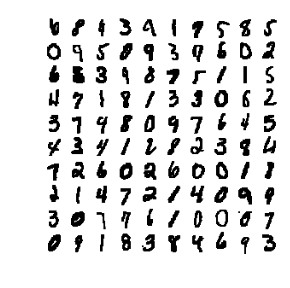

(<matplotlib.figure.Figure at 0x10d2a4690>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10db40650>)

In [30]:
a,_ = train_set.next()
from mlp.visualisers import show_batch_of_images
show_batch_of_images(a[:,0,:,:])

Epoch 0:
  error(train)=2.46e+00, acc(train)=1.24e-01, error(valid)=2.46e+00, acc(valid)=1.26e-01, params_penalty=0.00e+00
Epoch 1: 67.14s to complete
  error(train)=2.05e-01, acc(train)=9.37e-01, error(valid)=1.92e-01, acc(valid)=9.40e-01, params_penalty=0.00e+00
Epoch 2: 74.12s to complete
  error(train)=1.66e-01, acc(train)=9.49e-01, error(valid)=1.55e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00
Epoch 3: 76.10s to complete
  error(train)=1.49e-01, acc(train)=9.52e-01, error(valid)=1.46e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00
Epoch 4: 75.52s to complete
  error(train)=1.15e-01, acc(train)=9.64e-01, error(valid)=1.21e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00
Epoch 5: 74.02s to complete
  error(train)=1.24e-01, acc(train)=9.59e-01, error(valid)=1.36e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00
Epoch 6: 92.86s to complete
  error(train)=1.03e-01, acc(train)=9.67e-01, error(valid)=1.16e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00
Epoch 7: 69.82s to comple

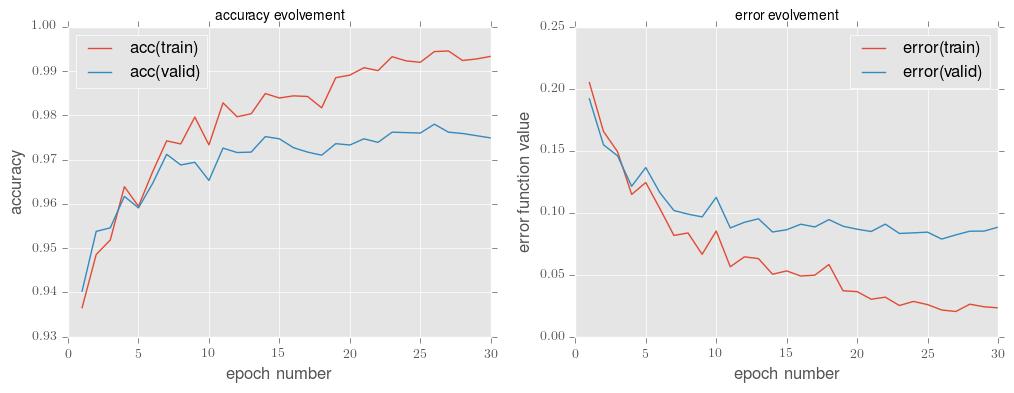

In [4]:
train_set = MNISTCNNResizeDataProvider(img_width=20, which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNResizeDataProvider(img_width=20, which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=12*12*4, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN Expert 20"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

with open("expert_model_20.pkl", 'wb') as f:
    pickle.dump(model, f)

In [ ]:
train_set = MNISTCNNResizeDataProvider(img_width=24, which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNResizeDataProvider(img_width=24, which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=12*12*4, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN Expert 24"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

with open("expert_model_24.pkl", 'wb') as f:
    pickle.dump(model, f)

In [ ]:
train_set = MNISTCNNDataProvider(which_set='train', batch_size=100, max_num_batches=-1, rng=rng)
valid_set = MNISTCNNDataProvider(which_set='valid', batch_size=100, max_num_batches=-1, rng=rng)


layers = [
    ConvolutionalLayer(num_input_channels=1, num_output_channels=4, 
                       input_dim_1=28, input_dim_2=28, 
                       kernel_dim_1=5, kernel_dim_2=5, kernels_init=kernels_init),
    TanhLayer(),
    MaxPoolingLayer(),
    ReshapeLayer(),
    AffineLayer(input_dim=12*12*4, output_dim=100, weights_initialiser=weights_init),
    TanhLayer(),
    AffineLayer(input_dim=100, output_dim=10, weights_initialiser=weights_init),
]

model = MultipleLayerModel(layers)
setting = Setting(model, error, learning_rule, train_set, valid_set)

remark = "CNN Expert"
settings = [setting]
experiment = Experiment(settings=settings, num_epoch=30, stats_interval=1, remark=remark)
experiment.do_experiment()

with open("expert_model_28.pkl", 'wb') as f:
    pickle.dump(model, f)

In [44]:
acc = lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()
a = []
for inputs_batch, targets_batch in valid_set:
    predict = model.fprop(inputs_batch)[-1]
    a.append(acc(predict, targets_batch))
print np.mean(a)

0.9508
